# Bullet Loan Analysis

This is an analysis of the bullet loan data provided here https://www.kaggle.com/zhijinzhai/loandata 

We will perform some Exploratory Data Analysis and see if we can fit a model to predict loan repayment. 
We will compare Logistic Regressions to Random Forrest and Decision Trees. 



From the website we can obtain the context:

"This data set includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The financial product is a bullet loan that customers should pay off all of their loan debt in just one time by the end of the term, instead of an installment schedule. Of course, they could pay off earlier than their pay schedule"

And the content of the data itself:
"Loan_id A unique loan number assigned to each loan customers

Loan_status Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts

Principal Basic principal loan amount at the origination

terms Can be weekly (7 days), biweekly, and monthly payoff schedule

Effective_date When the loan got originated and took effects

Due_date Since it’s one-time payoff schedule, each loan has one single due date

Paidoff_time The actual time a customer pays off the loan

Pastdue_days How many days a loan has been past due"



## Import our modules

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import os

%matplotlib inline

## Exploratory Data Analysis

In [2]:
loandf=pd.read_csv('../../../Downloads/Loan payments data.csv')

In [3]:
loandf.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [4]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


Looking at the above their is missing data in paid_off_time and in past_due_days. Past_due_days is missing alot so we may remove the column entirely, but we can see from the loan_status that it makes sense that a PAIDOFF loan would not be past due.

### EDA by columns

#### 1.Loan_ID 
Loan_ID is just an identifier for each loan, and we will drop it from modeling

#### 2. loan_status

This our target variable. Explore the variable.

In [5]:
loandf['loan_status'].unique()

array(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'], dtype=object)

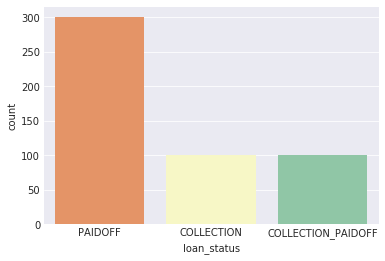

In [6]:
sns.set_style('darkgrid')
sns.countplot(loandf['loan_status'], palette='Spectral')

We can see that there is an approximate 3:1:1 ratio between paidoff, collection, and collection_paidoff

#### 3.Principal -orginal loan amount

In [7]:
loandf[['loan_status','Principal','Loan_ID']].groupby(['loan_status','Principal']).agg(['count'])

Loan_ID
                               count
loan_status        Principal        
COLLECTION         800            23
                   1000           77
COLLECTION_PAIDOFF 500             1
                   800            19
                   1000           80
PAIDOFF            300             6
                   500             2
                   700             1
                   800            69
                   900             2
                   1000          220

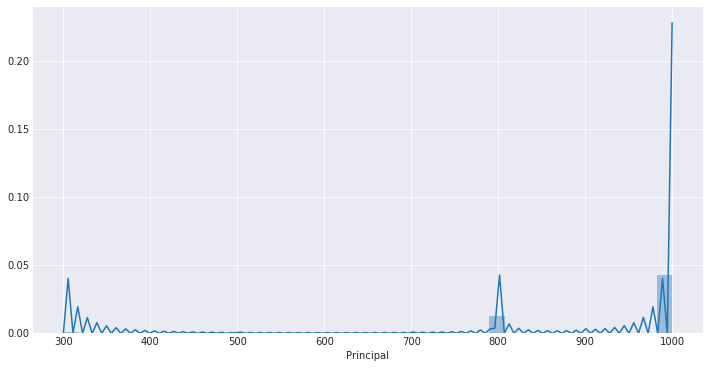

In [8]:
fig=plt.figure(figsize=(12,6))
sns.distplot(loandf['Principal'], bins=40)

we can see that most of the principal amount is at 1000 USD

#### 4. Terms- payoff schedule



Text(0.5,1,'Term Counts')

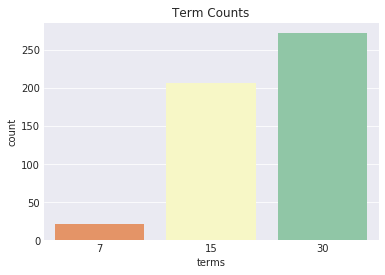

In [9]:
ax= sns.countplot(loandf['terms'], palette='Spectral')
ax.set_title('Term Counts')

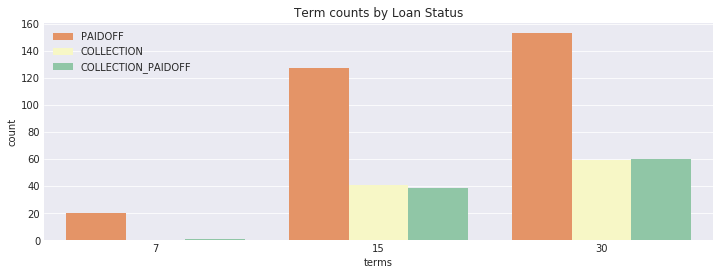

In [10]:
fig, ax=plt.subplots(figsize=(12,4))
sns.countplot(x='terms', hue='loan_status', data=loandf, palette='Spectral')
ax.set_title('Term counts by Loan Status')
ax.legend(loc='upper left')

#### Lets compute the  time in days to pay off the loan

In [11]:
loandf['Days to pay']= (pd.DatetimeIndex(loandf['paid_off_time']).normalize()
                        -pd.DatetimeIndex(loandf['effective_date']).normalize())/np.timedelta64(1,'D')

In [33]:
loandf['paid_off_date'] = pd.DatetimeIndex(loandf['paid_off_time']).normalize()

[Text(0,0,'0.0'),
 Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'6.0'),
 Text(0,0,'7.0'),
 Text(0,0,'8.0'),
 Text(0,0,'9.0'),
 Text(0,0,'10.0'),
 Text(0,0,'11.0'),
 Text(0,0,'12.0'),
 Text(0,0,'13.0'),
 Text(0,0,'14.0'),
 Text(0,0,'15.0'),
 Text(0,0,'16.0'),
 Text(0,0,'17.0'),
 Text(0,0,'18.0'),
 Text(0,0,'19.0'),
 Text(0,0,'20.0'),
 Text(0,0,'21.0'),
 Text(0,0,'22.0'),
 Text(0,0,'23.0'),
 Text(0,0,'24.0'),
 Text(0,0,'25.0'),
 Text(0,0,'26.0'),
 Text(0,0,'27.0'),
 Text(0,0,'28.0'),
 Text(0,0,'29.0'),
 Text(0,0,'30.0'),
 Text(0,0,'31.0'),
 Text(0,0,'32.0'),
 Text(0,0,'33.0'),
 Text(0,0,'35.0'),
 Text(0,0,'36.0'),
 Text(0,0,'37.0'),
 Text(0,0,'38.0'),
 Text(0,0,'41.0'),
 Text(0,0,'43.0'),
 Text(0,0,'44.0'),
 Text(0,0,'45.0'),
 Text(0,0,'48.0'),
 Text(0,0,'49.0'),
 Text(0,0,'52.0'),
 Text(0,0,'53.0'),
 Text(0,0,'54.0'),
 Text(0,0,'56.0'),
 Text(0,0,'57.0'),
 Text(0,0,'58.0'),
 Text(0,0,'59.0'),
 Text(0,0,'60.0'),
 Text(0,0,'64.0'),
 Te

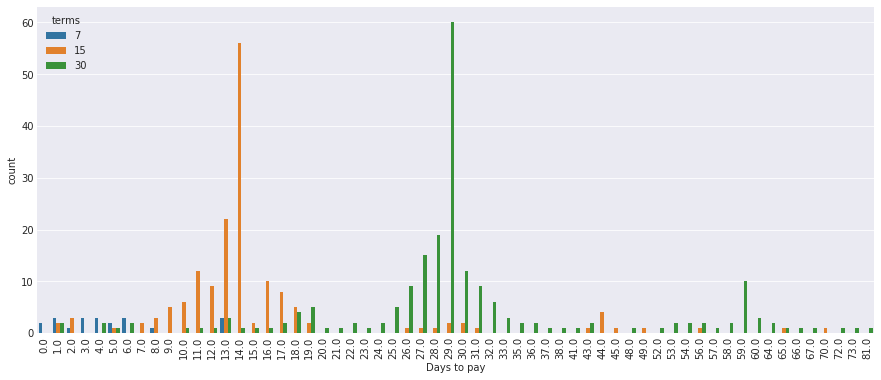

In [12]:
fig, ax=plt.subplots(figsize=(15,6))
ax=sns.countplot(x='Days to pay',hue='terms',data=loandf)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Lets just look at paidoff loans

[Text(0,0,'0.0'),
 Text(0,0,'1.0'),
 Text(0,0,'2.0'),
 Text(0,0,'3.0'),
 Text(0,0,'4.0'),
 Text(0,0,'5.0'),
 Text(0,0,'6.0'),
 Text(0,0,'7.0'),
 Text(0,0,'8.0'),
 Text(0,0,'9.0'),
 Text(0,0,'10.0'),
 Text(0,0,'11.0'),
 Text(0,0,'12.0'),
 Text(0,0,'13.0'),
 Text(0,0,'14.0'),
 Text(0,0,'15.0'),
 Text(0,0,'16.0'),
 Text(0,0,'17.0'),
 Text(0,0,'18.0'),
 Text(0,0,'19.0'),
 Text(0,0,'20.0'),
 Text(0,0,'21.0'),
 Text(0,0,'22.0'),
 Text(0,0,'23.0'),
 Text(0,0,'24.0'),
 Text(0,0,'25.0'),
 Text(0,0,'26.0'),
 Text(0,0,'27.0'),
 Text(0,0,'28.0'),
 Text(0,0,'29.0'),
 Text(0,0,'30.0'),
 Text(0,0,'44.0'),
 Text(0,0,'59.0')]

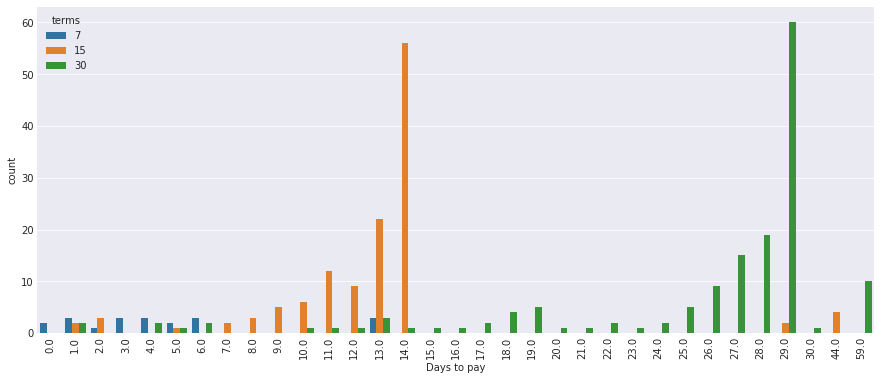

In [13]:
fig, ax=plt.subplots(figsize=(15,6))
ax=sns.countplot(x='Days to pay', hue='terms', data=loandf[loandf['loan_status']== 'PAIDOFF'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [16]:
tmp = loandf.loc[(loandf['Days to pay'] > 30) & (loandf['loan_status'] == 'PAIDOFF')]
print("{}: Incorrect status: {} observations")
print(tmp[['loan_status', 'terms', 'effective_date', 'due_date', 'paid_off_time']])

{}: Incorrect status: {} observations
    loan_status  terms effective_date    due_date     paid_off_time
85      PAIDOFF     30      9/11/2016   11/9/2016    11/9/2016 9:00
111     PAIDOFF     30      9/11/2016   11/9/2016    11/9/2016 9:00
122     PAIDOFF     15      9/11/2016  10/25/2016   10/25/2016 9:00
137     PAIDOFF     15      9/11/2016  10/25/2016   10/25/2016 9:00
146     PAIDOFF     30      9/11/2016   11/9/2016   11/9/2016 23:00
150     PAIDOFF     15      9/12/2016  10/26/2016   10/26/2016 9:00
165     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 16:00
196     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00
206     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00
215     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 16:00
222     PAIDOFF     30      9/12/2016  11/10/2016  11/10/2016 13:00
230     PAIDOFF     15      9/12/2016  10/26/2016   10/26/2016 9:00
272     PAIDOFF     30      9/14/2016  11/12/2016   11/12/2016 9:00
285     PA

This is peculiar, the effective dates and terms persiod dont add up to due date of the loan application. Will ignore this in ML.

#### Lets explore the demographic

Text(0.5,1,'Education of the gender')

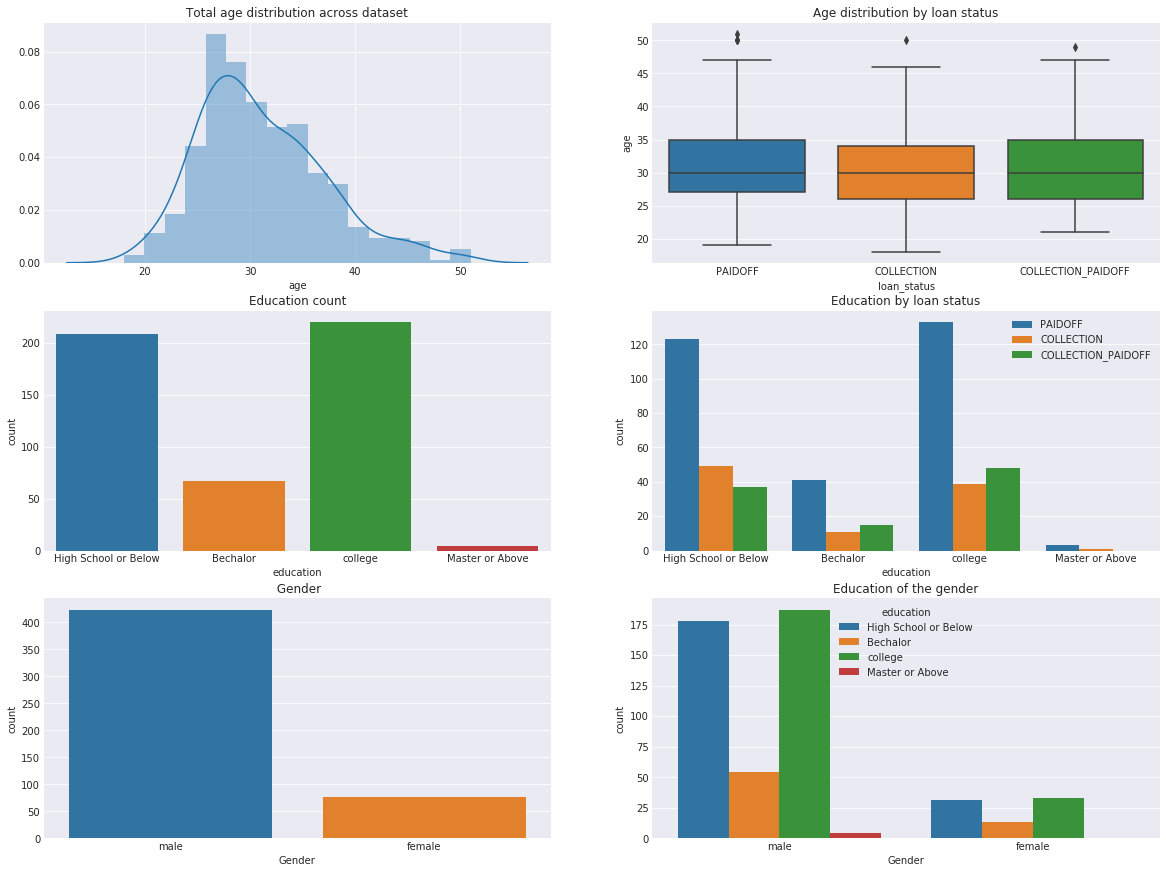

In [20]:
fig, axs=plt.subplots(3,2, figsize=(20,15))

sns.distplot(loandf['age'], ax=axs[0][0])
axs[0][0].set_title("Total age distribution across dataset")

sns.boxplot(x='loan_status', y='age', data=loandf, ax=axs[0][1])
axs[0][1].set_title("Age distribution by loan status")

sns.countplot(x='education', data=loandf, ax=axs[1][0])
axs[1][0].set_title("Education count")


sns.countplot(x='education', data=loandf, hue='loan_status', ax=axs[1][1])
axs[1][1].set_title("Education by loan status")
axs[1][1].legend(loc='upper right')


sns.countplot(x='Gender', data=loandf, ax=axs[2][0])
axs[2][0].set_title(" Gender")

sns.countplot(x='Gender', data=loandf, hue='education', ax=axs[2][1])
axs[2][1].set_title("Education of the gender")

Lets look at gender+education impact on loan status

In [21]:
pd.crosstab(loandf['loan_status'], loandf['Gender'] + "_" + loandf['education'], margins=True)

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0,7,3,11,42,1,36,100
COLLECTION_PAIDOFF,1,5,8,14,32,0,40,100
PAIDOFF,12,19,22,29,104,3,111,300
All,13,31,33,54,178,4,187,500


In [22]:
pd.crosstab(loandf['loan_status'],loandf['Gender']+"_"+loandf['education'],margins=True,normalize='all')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0.000,0.014,0.006,0.022,0.084,0.002,0.072,0.2
COLLECTION_PAIDOFF,0.002,0.010,0.016,0.028,0.064,0.000,0.080,0.2
PAIDOFF,0.024,0.038,0.044,0.058,0.208,0.006,0.222,0.6
All,0.026,0.062,0.066,0.108,0.356,0.008,0.374,1.0


In [23]:
pd.crosstab(loandf['loan_status'],loandf['Gender']+"_"+loandf['education'],margins=True,normalize='index')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college
loan_status,,,,,,,
COLLECTION,0.000,0.070000,0.030000,0.110000,0.420000,0.010,0.360
COLLECTION_PAIDOFF,0.010,0.050000,0.080000,0.140000,0.320000,0.000,0.400
PAIDOFF,0.040,0.063333,0.073333,0.096667,0.346667,0.010,0.370
All,0.026,0.062000,0.066000,0.108000,0.356000,0.008,0.374


In [24]:
pd.crosstab(loandf['loan_status'],loandf['Gender']+"_"+loandf['education'],margins=True,normalize='columns')

col_0,female_Bechalor,female_High School or Below,female_college,male_Bechalor,male_High School or Below,male_Master or Above,male_college,All
loan_status,,,,,,,,
COLLECTION,0.000000,0.225806,0.090909,0.203704,0.235955,0.25,0.192513,0.2
COLLECTION_PAIDOFF,0.076923,0.161290,0.242424,0.259259,0.179775,0.00,0.213904,0.2
PAIDOFF,0.923077,0.612903,0.666667,0.537037,0.584270,0.75,0.593583,0.6


## Time to model!

First lets fix the miseleading status loan records

Second change the categorical and variable to numerical 
we will merge collections and collections_paid off because we are interseted in those who paid on time!

We will convert education and gender to dummies

We will then perform Random Forest SVM and keras.


In [27]:
loandf.loc[(loandf['loan_status'] =='PAIDOFF' ) &(loandf['Days to pay']>30),'loan_status']='COLLECTION_PAIDOFF'

Text(0.5,1,'Count with new targets')

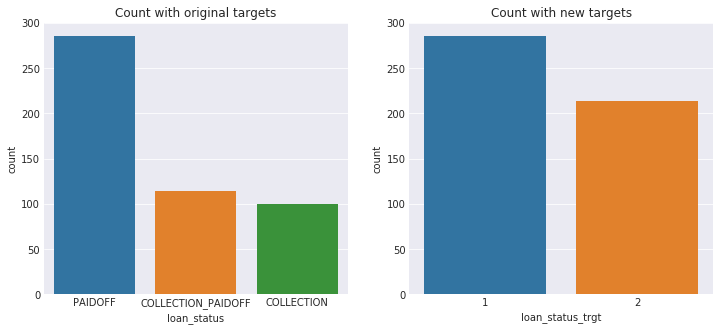

In [29]:
smap= {"PAIDOFF": 1, "COLLECTION": 2, "COLLECTION_PAIDOFF": 2 }
loandf['loan_status_trgt'] = loandf['loan_status'].map(smap)

fig, axs=plt.subplots(1,2,figsize=(12,5))

sns.countplot(x='loan_status',data=loandf,ax=axs[0])
axs[0].set_title('Count with original targets')

sns.countplot(x='loan_status_trgt', data=loandf, ax=axs[1])
axs[1].set_title('Count with new targets')


In [30]:
dummies=pd.get_dummies(loandf['education']).rename(columns=lambda x:'is_' +str(x))
loandf=pd.concat([loandf,dummies],axis=1)
loandf.drop(['education'],axis=1,inplace=True)

In [31]:
dummies=pd.get_dummies(loandf['Gender']).rename(columns=lambda x:'is_' +str(x))
loandf=pd.concat([loandf,dummies],axis=1)
loandf.drop(['Gender'],axis=1,inplace=True)

In [35]:
loandf.drop(['Loan_ID', 'loan_status', 'effective_date', 'due_date',
             'paid_off_time', 'past_due_days', 'paid_off_date', 'Days to pay'], axis=1,inplace=True)

In [36]:
dummyvar=['is_female','is_Master or Above']
loandf.drop(dummyvar,axis=1, inplace=True)

In [37]:
#create our inputs and target variable
X=loandf.drop('loan_status_trgt',axis=1)
y=loandf['loan_status_trgt']

In [39]:
#import ML libraries

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [65]:
## funciton to evaluate our models

def eval_model(model, data, target, splitratio):
    trainX, testX, trainY, testY = train_test_split(data, target, train_size=splitratio, random_state=0)
    model.fit(trainX,trainY)
    return model.score(testX,testY)

#### Random Forest 

In [66]:
import warnings
warnings.filterwarnings("ignore")

num_estimator=np.array([1,5,10,50,100,250,500])
num_sample=5
num_grid=len(num_estimator)
score_mean=np.zeros(num_grid)
score_sigma=np.zeros(num_grid)
j=0



print("RandomForestClassification Starting")
for x in num_estimator:
    score_array = np.zeros(num_sample) # Initialize
    for i in range(0,num_sample):
        rf_class = RandomForestClassifier(n_estimators = x, n_jobs=1, criterion="gini")
        score_array[i] = eval_model(rf_class, X, y, 0.8)
        print("Try {} with n_estimators = {} and score = {}".format( i, n_estimators, score_array[i]))
    score_mean[j], score_sigma[j] = np.mean(score_array), np.std(score_array)
    j=j+1

print("RandomForestClassification Done!")

RandomForestClassification Starting
Try 0 with n_estimators = 1 and score = 0.57
Try 1 with n_estimators = 1 and score = 0.57
Try 2 with n_estimators = 1 and score = 0.56
Try 3 with n_estimators = 1 and score = 0.49
Try 4 with n_estimators = 1 and score = 0.51
Try 0 with n_estimators = 1 and score = 0.5
Try 1 with n_estimators = 1 and score = 0.5
Try 2 with n_estimators = 1 and score = 0.55
Try 3 with n_estimators = 1 and score = 0.49
Try 4 with n_estimators = 1 and score = 0.58
Try 0 with n_estimators = 1 and score = 0.5
Try 1 with n_estimators = 1 and score = 0.55
Try 2 with n_estimators = 1 and score = 0.5
Try 3 with n_estimators = 1 and score = 0.52
Try 4 with n_estimators = 1 and score = 0.53
Try 0 with n_estimators = 1 and score = 0.52
Try 1 with n_estimators = 1 and score = 0.55
Try 2 with n_estimators = 1 and score = 0.5
Try 3 with n_estimators = 1 and score = 0.52
Try 4 with n_estimators = 1 and score = 0.55
Try 0 with n_estimators = 1 and score = 0.53
Try 1 with n_estimators 

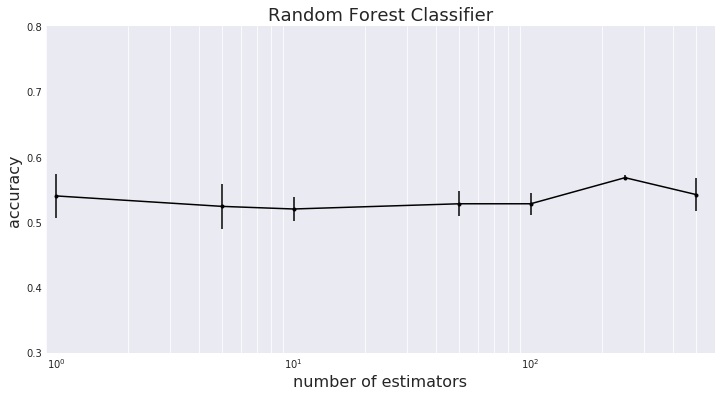

In [67]:
fig = plt.figure(figsize=(12,6))
plt.errorbar(num_estimator, score_mean, yerr=score_sigma, fmt='k.-')
plt.xscale("log")
plt.xlabel("number of estimators",size = 16)
plt.ylabel("accuracy",size = 16)
plt.xlim(0.9,600)
plt.ylim(0.3,0.8)
plt.title("Random Forest Classifier", size = 18)
plt.grid(which="both")



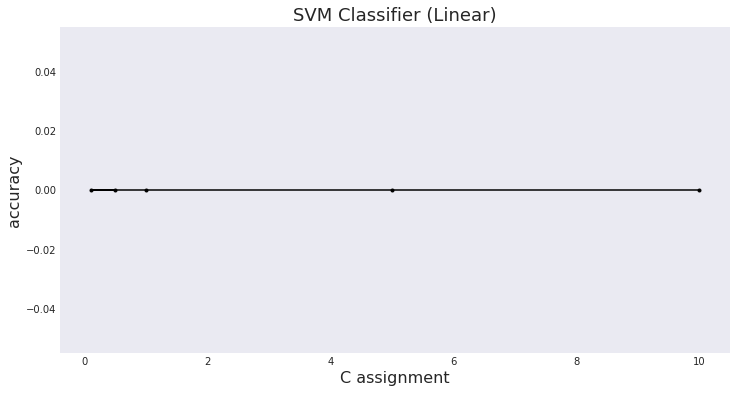

In [68]:
#SVM linear

C_ar = np.array([0.5, 0.1, 1, 5, 10])
score_ar = np.zeros(len(C_ar))
i=0
for C_val in C_ar:
    svc_class = svm.SVC(kernel='linear', random_state=1, C = C_val)
    score_array[i] = eval_model(svc_class, X, y, 0.8)
    i=i+1

score_mu, score_sigma = np.mean(score_ar), np.std(score_ar)

fig = plt.figure(figsize=(12,6))
plt.errorbar(C_ar, score_ar, yerr=score_sigma, fmt='k.-')
plt.xlabel("C assignment",size = 16)
plt.ylabel("accuracy",size = 16)
plt.title("SVM Classifier (Linear)", size = 18)
plt.grid(which="both")


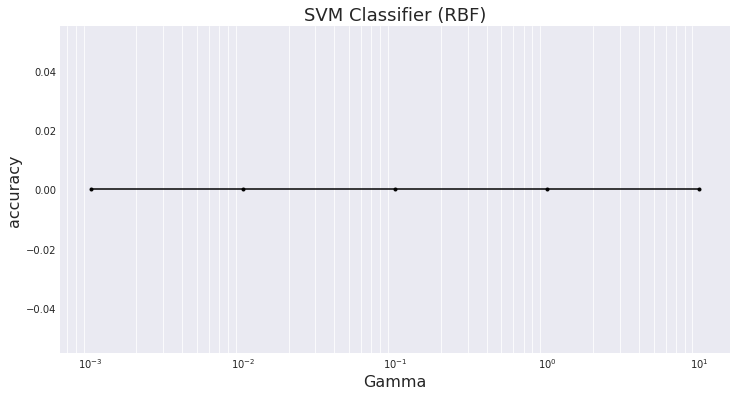

In [70]:
#adjusting our gamme
gamma_ar = np.array([0.001, 0.01, 0.1, 1, 10])
score_ar = np.zeros(len(gamma_ar))
score_mean = np.zeros(len(gamma_ar))
score_sigma = np.zeros(len(gamma_ar))
i=0
for l in gamma_ar:
    svc_class = svm.SVC(kernel='rbf', random_state=1, gamma = l)
    score_array[i] = eval_model(svc_class, X, y, 0.8)
    score_mean[i], score_sigma[i] = np.mean(score_ar[i]), np.std(score_ar[i])
    i=i+1


fig = plt.figure(figsize=(12,6))
plt.errorbar(gamma_ar, score_mean, yerr=score_sigma, fmt='k.-')
plt.xscale('log')
plt.xlabel("Gamma",size = 16)
plt.ylabel("accuracy",size = 16)
plt.title("SVM Classifier (RBF)", size = 18)
plt.grid(which="both")

In [59]:
#keras

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Change to np.array type
new_x = np.array(X)
new_y = np.array(y)

# fix random seed for reproducibility
np.random.seed(1234)

model = Sequential()
model.add(Dense(64, input_dim=7, init='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Using TensorFlow backend.


In [61]:
model.fit(new_x, new_y, epochs=150, batch_size=20)
scores = model.evaluate(new_x, new_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/150
500/500 [==============================] - 0s 246us/step - loss: -6.4015 - acc: 0.5580
Epoch 2/150
500/500 [==============================] - 0s 99us/step - loss: -6.5703 - acc: 0.5680
Epoch 3/150
500/500 [==============================] - 0s 104us/step - loss: -6.7068 - acc: 0.5720
Epoch 4/150
500/500 [==============================] - 0s 103us/step - loss: -6.7864 - acc: 0.5720
Epoch 5/150
500/500 [==============================] - 0s 88us/step - loss: -6.8009 - acc: 0.5720
Epoch 6/150
500/500 [==============================] - 0s 154us/step - loss: -6.8230 - acc: 0.5720
Epoch 7/150
500/500 [==============================] - 0s 124us/step - loss: -6.8233 - acc: 0.5720
Epoch 8/150
500/500 [==============================] - 0s 103us/step - loss: -6.7981 - acc: 0.5700
Epoch 9/150
500/500 [==============================] - 0s 121us/step - loss: -6.8058 - acc: 0.5720
Epoch 10/150
500/500 [==============================] - 0s 168us/step - loss: -6.7525 - acc: 0.5700
Epoch 11/15

500/500 [==============================] - 0s 154us/step - loss: -6.8233 - acc: 0.5720
Epoch 84/150
500/500 [==============================] - 0s 140us/step - loss: -6.8233 - acc: 0.5720
Epoch 85/150
500/500 [==============================] - 0s 147us/step - loss: -6.8233 - acc: 0.5720
Epoch 86/150
500/500 [==============================] - 0s 98us/step - loss: -6.8233 - acc: 0.5720
Epoch 87/150
500/500 [==============================] - 0s 161us/step - loss: -6.8233 - acc: 0.5720
Epoch 88/150
500/500 [==============================] - 0s 133us/step - loss: -6.8233 - acc: 0.5720
Epoch 89/150
500/500 [==============================] - 0s 138us/step - loss: -6.8233 - acc: 0.5720
Epoch 90/150
500/500 [==============================] - 0s 128us/step - loss: -6.8233 - acc: 0.5720
Epoch 91/150
500/500 [==============================] - 0s 95us/step - loss: -6.8233 - acc: 0.5720
Epoch 92/150
500/500 [==============================] - 0s 133us/step - loss: -6.8233 - acc: 0.5720
Epoch 93/150
50

### Results

We can see our SVM models did not work at all, but our RFC and keras models fitted with up to .57 accuracy